# Ley de los grandes números y Teorema del límite central

## Ley de los grandes números

¿Qué significa esto?      
Imagina que tienes un dado, el dado tiene 6 caras y es un dado justo, es decir la probabilidad de que caiga un **1, 2, 3, 4, 5 o 6** es la misma para cada cara del dado, entonces la probabilidad sería de $\frac 1 6$ para cada número, si yo lanzo el dado:

### 100 veces
La probabilidad puede variar

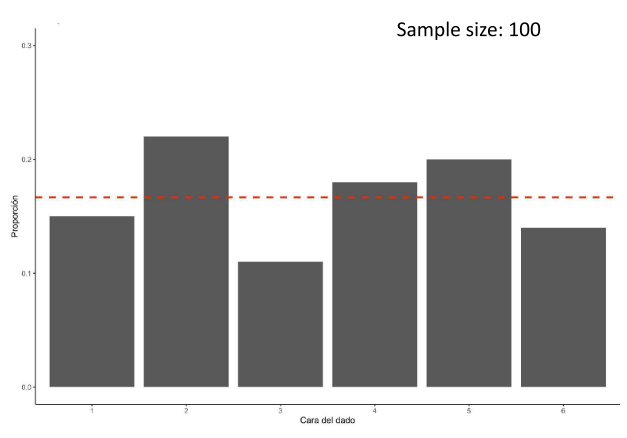

Como se puede ver la probabilidad es diferente para cada dado, entonces ¿por qué si acabamos de decir que es un dado justo?

¿Qué pasaría si yo continuara lanzando el dado un número mayor de veces?

### 1000 veces

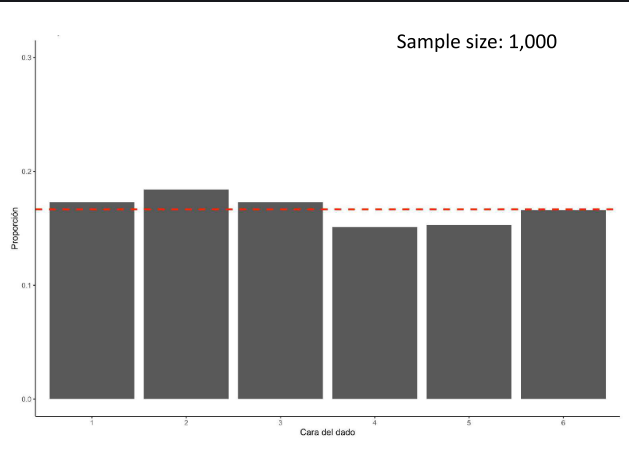

Ahora comenzamos a ver que la frecuencia de los números comienza a ser más equilibrada. En este caso la linea roja simboliza la probabilidad que debería tener cada cara del dado.

¿Qué pasa si aumentamos el número de lanzamientos?

### 10 000 veces
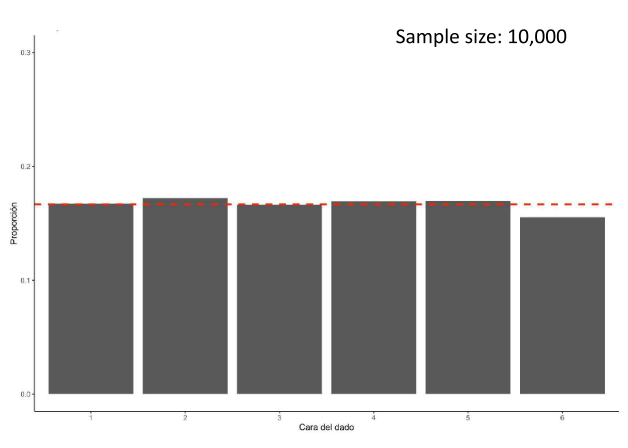

Ya estoy cerca de que las probabilidades sean equilibradas.

### 100 000 veces

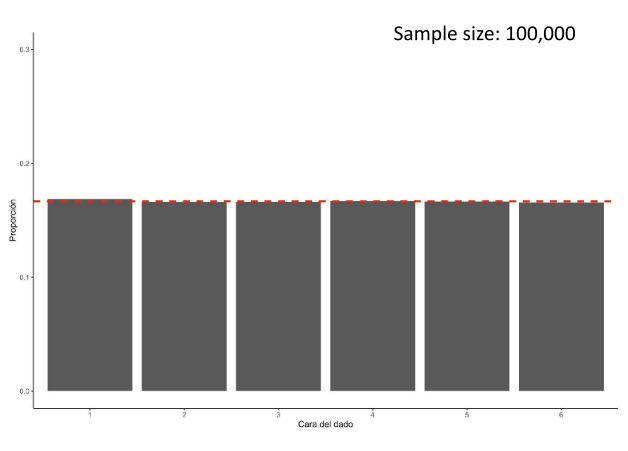

No hay una diferencia muy notable.

### 1 000 000 veces 
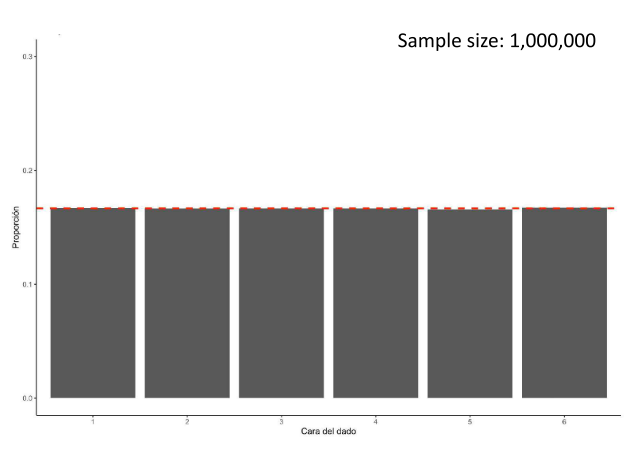

En este punto la diferencia es minima y podemos ver que la probabilidad es casi la misma para todas las caras, entonces a esto se refiere **La ley de los grandes números**

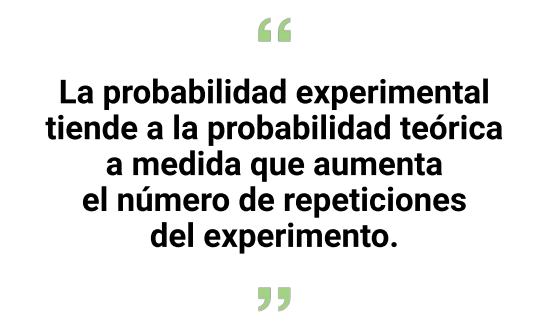

Esto va a ocurrir en distintas cosas, cuando nosotros queramos encontrar estas probabilidades; si nosotros tenemos la capacidad de incrementar el tamaño de la muestra, es muy probable que encontremos la probabilidad teórica.

## Teorema del límite central

Es un tema bastante utilizado e importante debido a que respalda la existencia de muchas cosas que hoy en día tenemos.

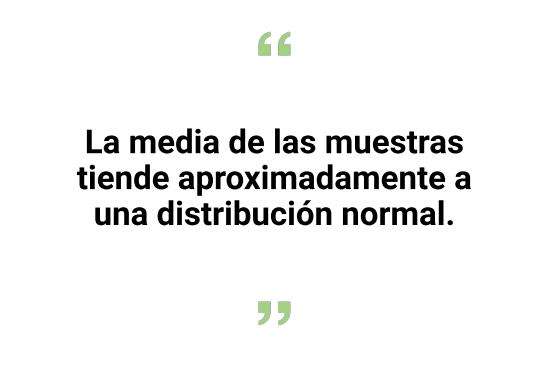

Una definición mas técnica de esto es:

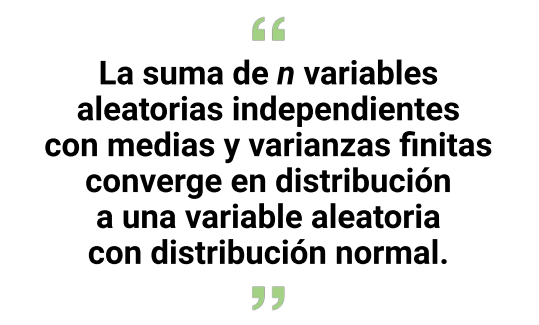

**¿Cómo se podría interpretar esto de manera visual?**
Lo haremos en código.

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [3]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv')

### Ley de los grandes números

En el ejemplo teníamos un dado, entonces vamos a crear una variable que se llame **dado**. Usaremos `empiricaldist`

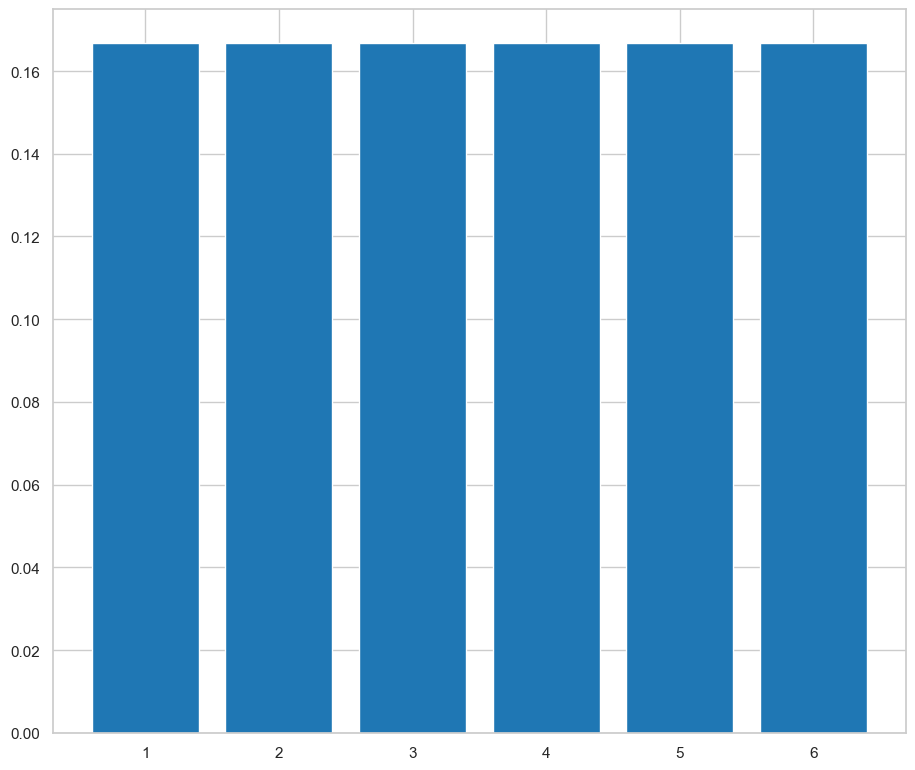

In [4]:
dado = empiricaldist.Pmf.from_seq(
    [1,2,3,4,5,6])
dado.bar()

In [5]:
dado(1)

0.16666666666666666

Efectivamente aquí podemos ver la probabilidad de que caiga cierto valor de cara del dado. Esperaríamos que todos tuvieran $\frac 1 6$ de probabilidad.

Entonces nosotros podríamos usar este dado, para explorar la **Ley de los grandes números**.

In [6]:
for sample_size in (1e2,1e3,1e4):
    sample_size = int(sample_size)
    #lanzar nuestro dado
    valores = dado.sample(sample_size)
    print(valores)

[3. 5. 1. 6. 2. 4. 2. 1. 6. 2. 2. 5. 6. 3. 4. 5. 5. 6. 5. 1. 1. 6. 3. 3.
 2. 6. 3. 4. 1. 5. 1. 2. 4. 6. 4. 6. 3. 5. 2. 3. 6. 4. 4. 6. 1. 6. 3. 4.
 1. 4. 6. 1. 2. 5. 4. 2. 1. 6. 2. 3. 6. 6. 3. 6. 2. 5. 3. 2. 3. 6. 4. 2.
 6. 1. 3. 6. 4. 3. 1. 6. 2. 1. 3. 3. 3. 6. 5. 5. 3. 3. 2. 3. 4. 4. 2. 6.
 6. 3. 5. 6.]
[6. 6. 4. 5. 6. 5. 3. 5. 2. 6. 4. 1. 5. 4. 1. 1. 2. 3. 1. 6. 3. 6. 6. 3.
 2. 4. 5. 6. 3. 3. 1. 6. 1. 5. 5. 5. 4. 1. 5. 6. 3. 5. 6. 4. 6. 2. 3. 5.
 6. 5. 4. 1. 2. 6. 2. 4. 2. 6. 6. 3. 1. 1. 4. 1. 5. 4. 3. 2. 4. 3. 3. 2.
 1. 4. 2. 6. 4. 2. 6. 6. 2. 6. 3. 2. 3. 1. 1. 4. 4. 6. 1. 2. 1. 1. 2. 6.
 5. 4. 3. 2. 5. 2. 2. 3. 3. 2. 6. 4. 5. 6. 5. 3. 2. 5. 2. 3. 1. 3. 6. 1.
 3. 3. 1. 5. 5. 6. 1. 3. 5. 2. 1. 4. 5. 4. 2. 1. 3. 5. 4. 1. 5. 3. 2. 2.
 3. 3. 1. 1. 5. 2. 6. 1. 5. 3. 2. 3. 2. 6. 6. 2. 4. 6. 4. 1. 3. 2. 2. 1.
 4. 2. 2. 3. 4. 6. 6. 3. 5. 5. 2. 6. 1. 2. 6. 6. 1. 1. 3. 4. 3. 1. 5. 5.
 5. 4. 4. 3. 1. 1. 6. 6. 4. 1. 3. 3. 4. 6. 5. 6. 3. 3. 2. 5. 4. 1. 3. 3.
 6. 4. 5. 3. 4. 5. 3. 2. 1. 3. 5. 3. 

Como se puede observar nosotros tenemos diferentes valores de lanzamiento de dado. Ahora lo que nos interesa es calcular los PMFs

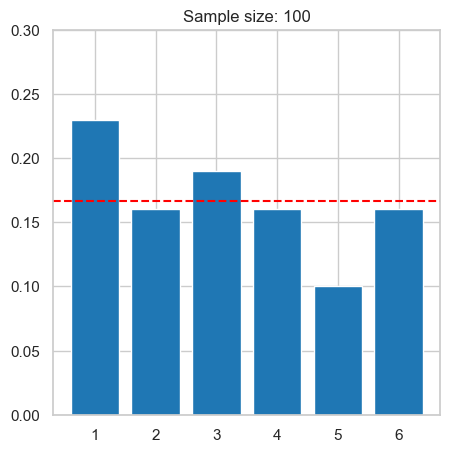

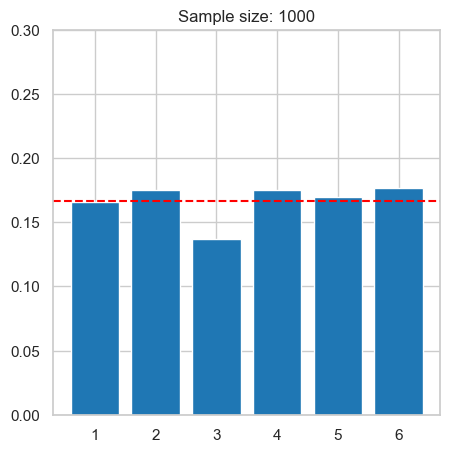

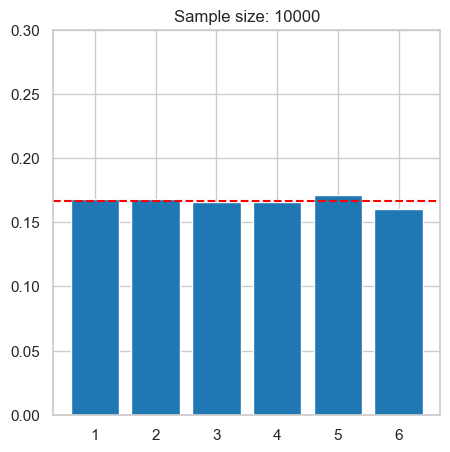

In [11]:
for sample_size in (1e2,1e3,1e4):
    sample_size = int(sample_size)
    #lanzar nuestro dado
    valores = dado.sample(sample_size)
    #calculando la probabilidad para cada iteración
    sample_pmf=empiricaldist.Pmf.from_seq(valores)
    #Graficando
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6,color='red',linestyle='dashed')
    plt.ylim([0, 0.30])
    plt.title(f'Sample size: {sample_size}')

Lo que se pudo ver es que conforme aumentemos el tamaño de muestras nos acercamos más a la probabilidad **discreta** que esperaríamos

### Teorema del límite central

Usaremos nuestro data set de pingüinos y la variable `sex`.

In [12]:
preprocessed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

En la anterior linea de código obtuvimos la proporción de machos y hembras. Se puede simbolizar como una gráfica de barras, pero esta distribución en realidad se le conoce como una **Distribución binomial**, pero una distribución de este tipo trabaja con números, no con categorías. 

Entonces necesitamos convertir los datos de la variable categórica a números.

In [13]:
sex_num = preprocessed_penguins_df.sex.replace(['male','female'],[1,0])
sex_num

0      1.0
1      0.0
2      0.0
3      NaN
4      0.0
      ... 
339    1.0
340    0.0
341    1.0
342    1.0
343    0.0
Name: sex, Length: 344, dtype: float64

Entonces aquí ya remplazamos los valores `['male','female']` por los valores ``[1,0]``.

Ahora ya no es una variable categórica. Lo guardamos y podremos proceder a realizar nuestro ejercicio.

#### Ejercicio:
Consiste en ir tomando muestras. Calcular un número determinado de muestras y en cada muestreo que hagamos vamos a tomar o sacar cierta cantidad de pingüinos `(sample_size)`.

En este caso vamos a ajustar que sean 1 000 aleatorias y en cada muestreo, vamos a tomar 35 pingüinos, después vamos a contar la proporción de machos en el muestreo y lo agregamos a una nueva columna. Finalmente una vez que terminen todas las iteraciones, vamos a calcular el **promedio** de todas estas muestras que calculamos y vamos a ver si se parece a lo que habíamos calculado a un inicio.


In [27]:

number_samples=1000
sample_size=35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_num.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: \n{male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 
50.3837%


Entonces si nos fijamos es muy similar al 50.45% de nuestros datos en el data set. Si nosotros incrementamos el número de muestras alcanzaríamos de manera exacta.


Pero si nosotros si siguiéramos aumentando el numero de muestras, alcanzaríamos el número de manera exacta.

De acuerdo a la definición del teorema de limite central es:

Nosotros al tener cualquier distribución, en este caso una distribución binomial, a traves de sacar muestreos aleatorios y aumentar las muestras, nos podíamos acercar a la media real de la población, sin importar la distribución. **En este caso la media era la distribución de machos**.

Ahora para corroborarlo necesitamos graficar esto.

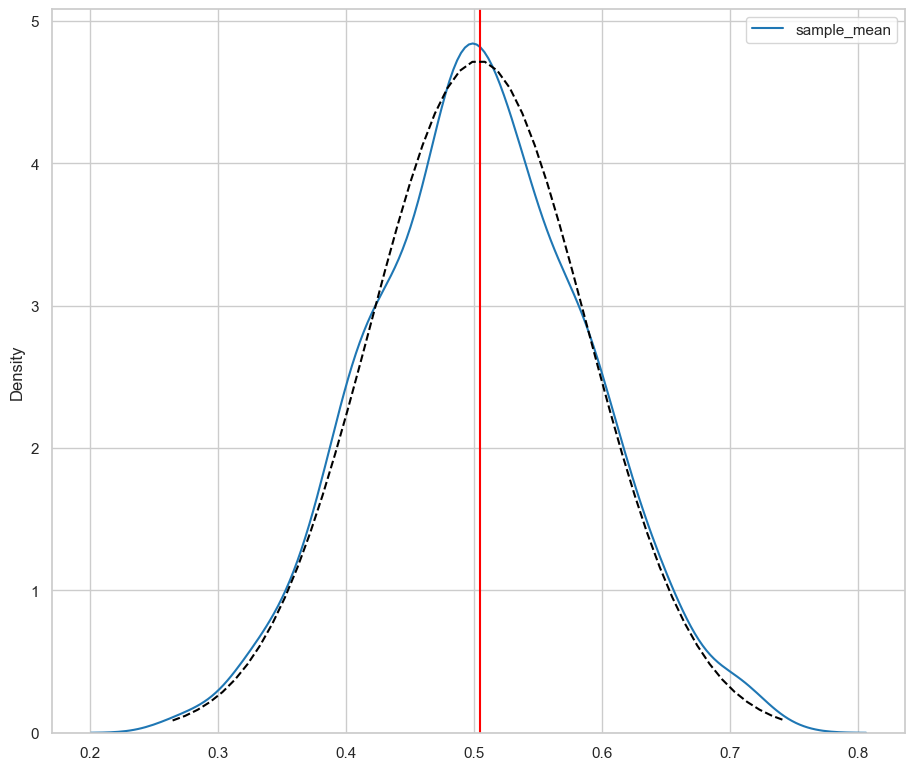

In [51]:
#distribución real binomial
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_num.mean(), color='red')

# Generate x values for the theoretical normal distribution
xs = np.linspace(sample_means_binomial.min(), sample_means_binomial.max(), 50)

# Calculate the PDF for the theoretical normal distribution
ys = scipy.stats.norm(sample_means_binomial.mean(), sample_means_binomial.std()).pdf(xs)

# Plot the theoretical normal distribution
plt.plot(xs, ys, color='black', linestyle='dashed')


Fijémonos que esto tiene forma de una distribución normal.

Lo que se resumen en, no importa de que tipo de distribución vengas, siempre vas a poder encontrar una distribución normal. Y a esta distribución normal, tu le puedes sacar mayor información.

In [37]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

Aquí lo que hacemos es contar las muestras. Vamos a graficarlo.

(0.30450450450450445, 0.7045045045045044)

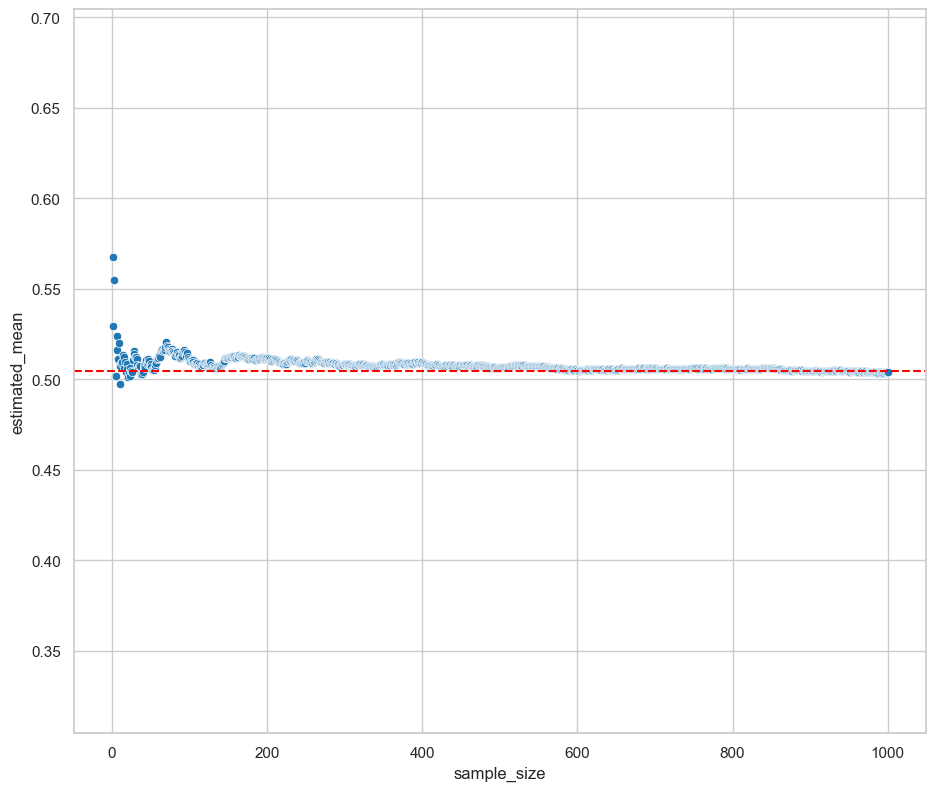

In [38]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_num.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_num.mean() - 0.20, sex_num.mean() + 0.20])

Al final la gráfica se ve así, donde:  
- en el eje X tenemos: el tamaño de nuestra muestra.
- en el eje Y tenemos: la media o promedio estimado.

Fijémonos que mientras vamos incrementando el tamaño de las muestras, nuestros puntos se van acercando a la linea rojo (en este caso el valor esperado del promedio de la población de machos real en la población de pingüinos).
